In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_data_to_load)
#print(f'Mouse and Drug Data {df_mouse.shape}')

df_clinical = pd.read_csv(clinical_trial_data_to_load)
#print(f'Clinical Trial Data {df_clinical.shape}')

# Combine the data into a single dataset
df_mouse_clinical= pd.merge( df_clinical, df_mouse, how='left', on=['Mouse ID', 'Mouse ID'] )
#print (f'City + ride data {df_mouse_clinical}')

# Display the data table for preview
df_mouse_clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
df_tumor_response = df_mouse_clinical.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].agg(['mean']).rename(columns={'mean':'Tumor Volume (mm3)'})

# Preview DataFrame
df_tumor_response

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_sem = df_mouse_clinical.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].agg(['sem']).rename(columns={'sem':'Tumor Volume (mm3)'})
# Convert to DataFrame

# Preview DataFrame
df_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
#df1 = df_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').reset_index()
df_tumor_response_unstack = df_tumor_response.unstack(level=0)
df_tumor_response_unstack.head()
# Preview that Reformatting worked


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

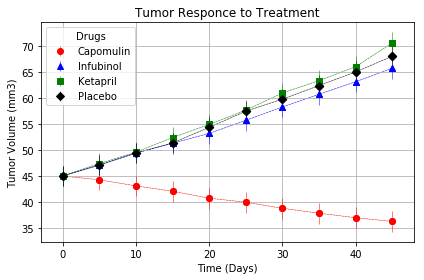

In [6]:
# Generate the Plot (with Error Bars)
df_sem.head()
unstack_df = df_sem.unstack(level=0)

#create a generator
colorgen = iter(['red', 'blue', 'green', 'black'])
symgen = iter(['o', '^', 's', 'D'])

#Draw a plot
for row, column in df_tumor_response_unstack.iteritems():
    x = [i for i in column.index.values]
    y = [i for i in column]
    if ((row[1] == 'Capomulin') | (row[1] == 'Infubinol')| (row[1] == 'Ketapril')| (row[1] == 'Placebo') ):
        try:
            color = next(colorgen)
            symbol = next(symgen)
        except:
            pass
        plt.errorbar(x, y,  fmt=symbol, c=color, elinewidth = .5, label=row[1],  yerr=2)         
        plt.scatter(x=x, y=y, c=color, marker=symbol)
        plt.plot(x, y, zorder=-1,  c=color, linestyle='--', dashes=(5, 1), linewidth = .5)
        

#Others 
lgnd = plt.legend(loc="best", numpoints=1, fontsize=10, title="Drugs")
plt.title('Tumor Responce to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.grid()
plt.tight_layout()

# Save Figure
plt.savefig("../Images/TumorResponcetoTreatment.png")
plt.show()
    

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_mean = df_mouse_clinical.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].agg(['mean']).rename(columns={'mean':'Metastatic Sites'})
df_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df_Metastatic_sem = df_mouse_clinical.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].agg(['sem']).rename(columns={'sem':'Metastatic Sites'})

# Preview DataFrame
df_Metastatic_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

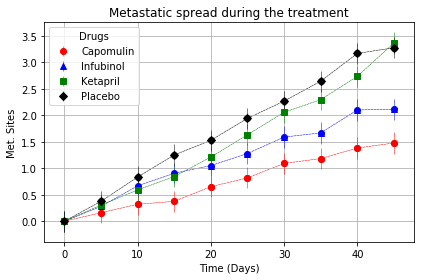

In [9]:
# Minor Data Munging to Re-Format the Data Frames
df_mean.unstack(level=0)

# Generate the Plot (with Error Bars)
unstack_df = df_mean.unstack(level=0)

#create a generator
colorgen = iter(['red', 'blue', 'green', 'black'])
symgen = iter(['o', '^', 's', 'D'])

#Draw a plot
for row, column in unstack_df.iteritems():
    x = [i for i in column.index.values]
    y = [i for i in column]
    if ((row[1] == 'Capomulin') | (row[1] == 'Infubinol')| (row[1] == 'Ketapril')| (row[1] == 'Placebo') ):
        try:
            color = next(colorgen)
            symbol = next(symgen)
        except:
            pass
        plt.errorbar(x, y,  fmt=symbol, c=color, elinewidth = .5, label=row[1],  yerr=0.2)        
        plt.scatter(x=x, y=y,  c=color)
        plt.plot(x, y, zorder=-1,  c=color, linestyle='--', dashes=(5, 1), linewidth = .5)

#Others 
lgnd = plt.legend(loc="best", numpoints=1, fontsize=10, title="Drugs")
plt.title('Metastatic spread during the treatment')
plt.ylabel('Met. Sites')
plt.xlabel('Time (Days)')
plt.grid()
plt.tight_layout()

# Save Figure
plt.savefig("../Images/Metastaticspread.png")
plt.show()


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
df_mouse_count = df_mouse_clinical.groupby(['Drug', 'Timepoint'])['Mouse ID'].agg(['count']).rename(columns={'count':'Mouse Count'})

# Preview DataFrame
df_mouse_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
unstack_mouse_count = df_mouse_count.unstack(level = 0)

# Preview the Data Frame
unstack_mouse_count.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

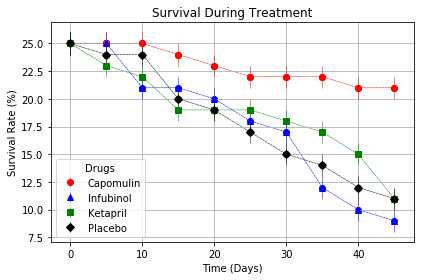

In [15]:
# Generate the Plot (with Error Bars)

#create a generator
colorgen = iter(['red', 'blue', 'green', 'black'])
symgen = iter(['o', '^', 's', 'D'])

#Draw a plot
for row, column in unstack_mouse_count.iteritems():
    x = [i for i in column.index.values]
    y = [i for i in column]
    if ((row[1] == 'Capomulin') | (row[1] == 'Infubinol')| (row[1] == 'Ketapril')| (row[1] == 'Placebo') ):
        try:
            color = next(colorgen)
            symbol = next(symgen)
        except:
            pass
        plt.errorbar(x, y, yerr=1, fmt=symbol, c=color, elinewidth = .5, label=row[1])        
        plt.scatter(x=x, y=y, c=color)
        plt.plot(x, y, zorder=-1,  c=color, linestyle='--', dashes=(5, 1), linewidth=.5)        

#Others 
lgnd = plt.legend(loc="best", numpoints=1, fontsize=10, title="Drugs")
plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time (Days)')
plt.grid()
plt.tight_layout()

# Save Figure
plt.savefig("../Images/SurvivalDuringTreatment.png")
plt.show()


## Summary Bar Graph

In [12]:
# Calculate the percent changes for each drug
df_tumor_response = df_mouse_clinical.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].agg(['mean'])
Summary_dict={}

unstack_df = df_tumor_response.unstack(level=0)
for row, column in unstack_df.iteritems():
    Summary_dict[row[1]] =  ((column.iloc[-1]-column.iloc[0])/column.iloc[0])*100

Summary = pd.DataFrame.from_dict(Summary_dict, orient='index')
Summary.columns = ['']
Summary.columns.name = 'drug'
Summary
# Display the data to confirm


drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


In [13]:
# functions to label the percentages of changes

def plot_label(rects):
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
    
        # Number of points between bar and label. Change to your liking.
        space = 2

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space = -5
    
        # Use Y value as label and format number with one decimal place
        label = "{:.0f}%".format(y_value)
        
        plt.text(x_value, space, label, color='white')
        print(x_value)
    
        # Create annotation( Keeping for referance )
#        plt.annotate(
#            label,                      # Use `label` as label
#            (x_value, 0),                # Place label at end of the bar
#            xytext=(0, space),          # Vertically shift label by `space`
#            textcoords="offset points",          # Interpret `xytext` as offset in points
#            ha='center',                # Horizontally center label
#            va=va)                      # Vertically align label differently for
                                      # positive and negative values.
    

-0.5
0.5
1.5
2.5


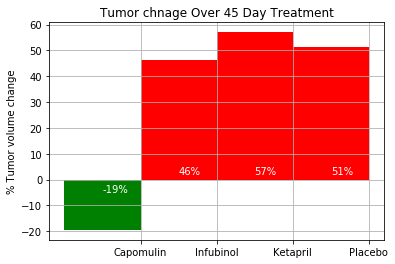

In [14]:
# Store all Relevant Percent Changes into a Tuple
items = Summary_dict.items()

# Splice the data between passing and failing drugs
for row, column in items:
    if ((row == 'Capomulin') | (row == 'Infubinol')| (row == 'Ketapril')| (row == 'Placebo') ):
        if column < 0:
            color = 'green'
        else:
            color = 'red'
        b = plt.bar(row, column, color=color, width=-1,align='edge')
        # Call functions to implement the function calls        
        plot_label(b.patches)

# Orient widths. Add labels, tick marks, etc. 
plt.title('Tumor chnage Over 45 Day Treatment')
plt.ylabel('% Tumor volume change')
plt.grid()

# Save the Figure
plt.savefig("../Images/TumorchnageOver45DayTreatment.png")
    

# Show the Figure
plt.show()

# Observation

#### 1. Capomulin shows the best response for the treatment and is the over all winner in all the aspects 

#### 2. Ketapril has the worst response to tumor volume.

#### 3. Infubinol has the worse servial rate. Capomulin is again a winner.